<a href="https://colab.research.google.com/github/NurlailyAsrobika16/PCVK_Genap_2023/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


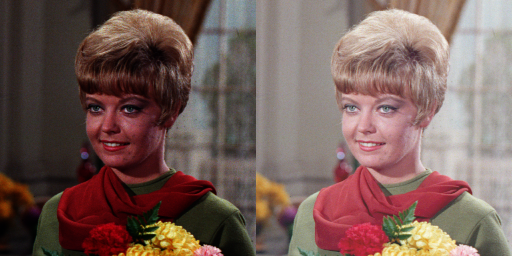

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))       # Input nilai bertipe data int
except ValueError:
 print('Error, not a number')

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma                            # invers dari gamma
 
    table = [((i / 255) ** invGamma) * 255 for i in range(256)] # rumus gamma correction untuk i dalam range 256
    table = np.array(table, np.uint8)                           #  table menjadi array numpy yang bertipe data int 8
 
    return cv.LUT(src, table)        # menghasilkan array dengan ukuran dan jumlah saluran yang sama seperti scr(memiliki elemen 8bit) tapi memiliki kedalaman yang sama dengan table(256 elemen).
 
 
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
gama_image = gammaCorrection(img, gamma)                        # menghasilkan gambar dengan memanggil fungsi gammaCorrection

final_frame = cv.hconcat((img, gama_image))
cv2_imshow(final_frame)
     

2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.
Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

Image Depth Simulation pada citra
--------------------------------
Masukkan nilai Depth : 2


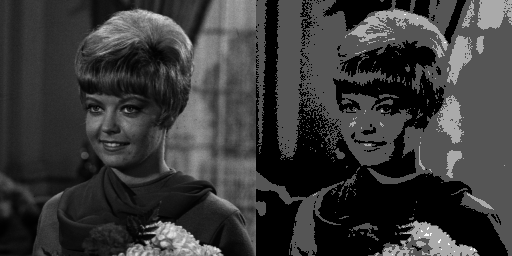

In [6]:

print('Image Depth Simulation pada citra')
print('--------------------------------')

try: 
  depth = int(input('Masukkan nilai Depth : '))     # Input nilai bertipe data int
except ValueError:
  print('error, not a number')

d_img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff', cv.IMREAD_GRAYSCALE)
level = 255/(2** depth - 1)       # mencari level dari nilai depth yang sudah diinputkan

for i in range (depth):
  # operasi perubahan menjadi warna baru dengan memanfaatkan fungsi round yang sudah ada di
  # dalam numpy untuk membulatkan setiap hasil yang didapatkan, tidak lupa digunakan data type
  # uint8 untuk memastikan bahwa nilai yang dihasilkan berada dalam range 0-256 dan angka
  # tidak boleh minus.
  d_img2 = np.array(np.round((d_img/level))*level, dtype='uint8')

final_frame2 = cv.hconcat((d_img, d_img2))
cv2_imshow(final_frame2)
     

3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

In [7]:
import glob
import math

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)


In [8]:
cv_img[0].dtype

dtype('uint8')

In [9]:

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sam
  # a sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

In [10]:
def average_denoise(length_max = 5):
  avg_img = np.zeros(cv_img[0].shape, cv_img[0].dtype)
  sum = np.zeros(cv_img[0].shape, dtype=np.int32)
  for img in cv_img[0:length_max]:
    for x in range(img.shape[0]):
      for y in range(img.shape[1]):
        for z in range(img.shape[2]):
          sum[x, y, z] += int(img[x, y, z])
  

  for x in range(avg_img.shape[0]):
    for y in range(avg_img.shape[1]):
      for z in range(avg_img.shape[2]):
        avg_img[x, y, z] = np.clip(round(sum[x, y, z] / length_max),0,255)

  final_frame_avg = cv.hconcat((cv_img[0], avg_img))
  cv2_imshow(final_frame_avg)
  print('NILAI PSNR ADALAH: ', PSNR(cv_img[0], avg_img))

AVG Denoise 5


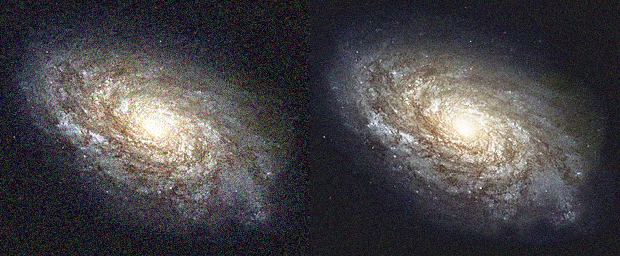

NILAI PSNR ADALAH:  29.120981366332906


In [11]:
print('AVG Denoise 5')
average_denoise(5)


AVG Denoise 10


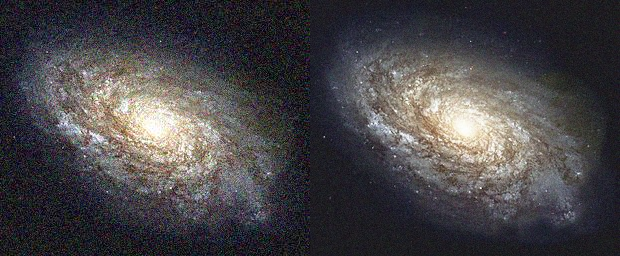

NILAI PSNR ADALAH:  29.00198917049181


In [12]:
print('AVG Denoise 10')
average_denoise(10)

AVG Denoise 30


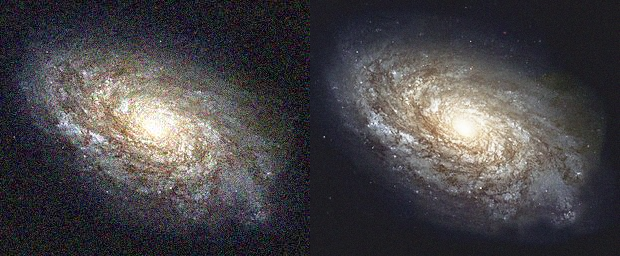

NILAI PSNR ADALAH:  28.93494747174355


In [13]:

print('AVG Denoise 30')
average_denoise(30)

AVG Denoise 60


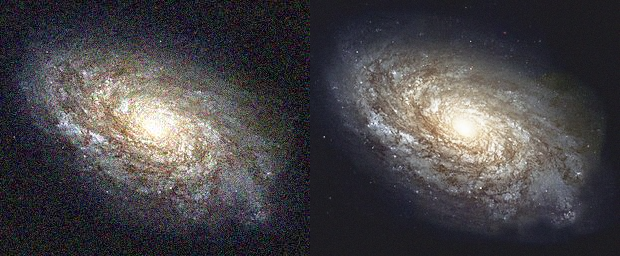

NILAI PSNR ADALAH:  28.925267081376077


In [14]:
print('AVG Denoise 60')
average_denoise(60)

AVG Denoise 80


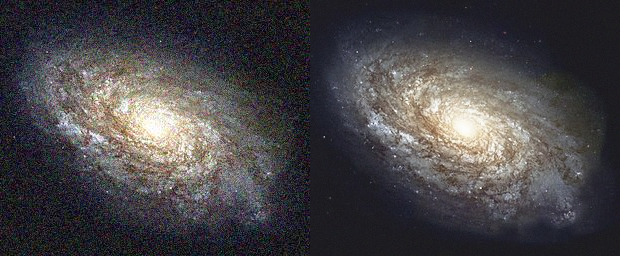

NILAI PSNR ADALAH:  28.91216640046526


In [16]:
print('AVG Denoise 80')
average_denoise(80)
     

AVG Denoise 100


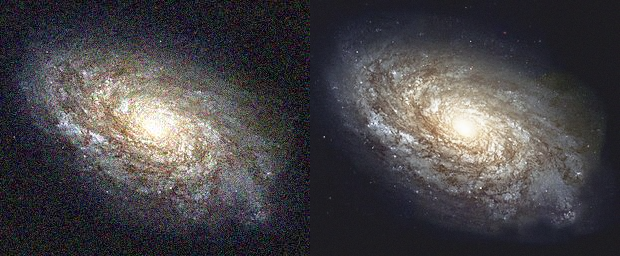

NILAI PSNR ADALAH:  28.91492357147659


In [17]:
print('AVG Denoise 100')
average_denoise(100)

dari percobaan yang telah dilakukan, dapat disimpulkan semakin kecil perubahan nilai piksel pada citra hasil pemrosesan dibandingkan dengan citra asli, maka akan semakin tinggi nilai dari PSNR yang dihasilkan.

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:

(256, 256, 3)


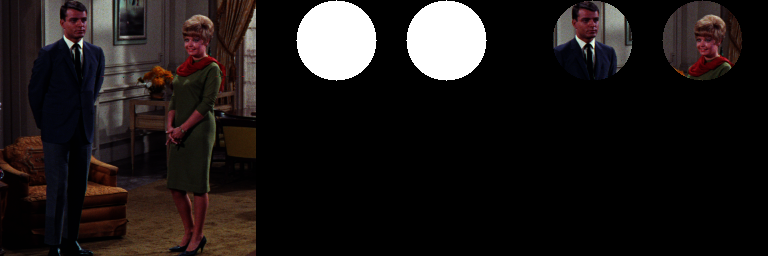

In [19]:
img_masking = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/couple.tiff')
print(img_masking.shape)

mask1 = np.zeros(img_masking.shape, dtype=np.uint8)
mask = cv.circle(mask1,(80, 40), 40, (255,255,255), -1)
mask = cv.circle(mask1,(190, 40), 40, (255,255,255), -1)

result_and = img_masking & mask

final_frame_masking1 = cv.hconcat((img_masking, mask, result_and))
cv2_imshow(final_frame_masking1)

**Menggunakan operator 'OR'**

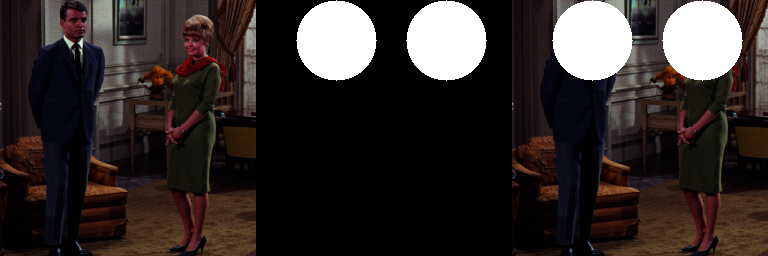

In [20]:
result_or = img_masking | mask

final_frame_masking2 = cv.hconcat((img_masking, mask, result_or))
cv2_imshow(final_frame_masking2)

**Menggunakan operator 'NOT'**

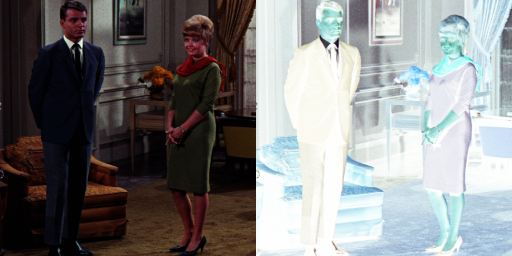

In [21]:
result_not = ~img_masking

final_frame_masking3 = cv.hconcat((img_masking, result_not))
cv2_imshow(final_frame_masking3)

**Menggunakan operator 'Not-AND (NAND)'**

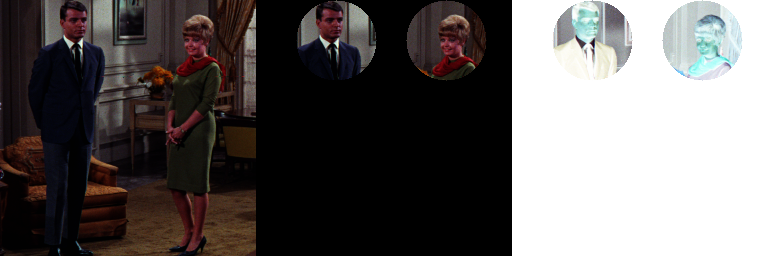

In [22]:
result_nand = ~result_and

final_frame_masking4 = cv.hconcat((img_masking, result_and, result_nand))
cv2_imshow(final_frame_masking4)

**Menggunakan operator 'XOR'**

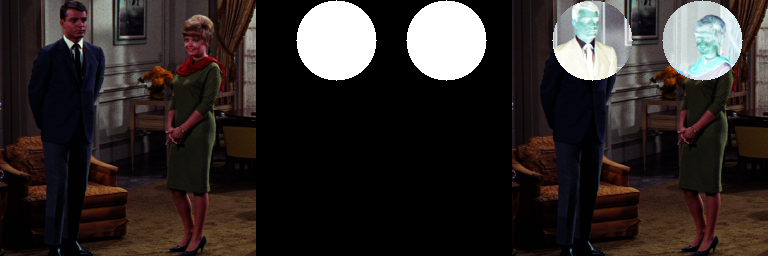

In [23]:
result_xor = img_masking ^ mask

final_frame_masking5 = cv.hconcat((img_masking, mask, result_xor))
cv2_imshow(final_frame_masking5)

Hasil Analisa:

*   AND:  memiliki daerah yang tumpang tindih dari kedua gambar input yang menjadi
lebih terang, sedangkan daerah lainnya menjadi lebih gelap.
*  OR: memiliki daerah yang merupakan gabungan dari kedua gambar input menjadi lebih terang, sedangkan daerah di luar dari kedua gambar input menjadi lebih gelap.

*   NOT: membalik nilai piksel pada gambar, dimana daerah yang mulanya bernilai 0 menjadi bernilai 1, begitupun sebaliknya

*   NAND: daerah yang sama-sama bernilai 1 pada kedua gambar input menjadi lebih gelap, sedangkan daerah lainnya menjadi lebih terang.

*   XOR: daerah yang hanya ada di salah satu gambar input menjadi lebih terang, sedangkan daerah yang tumpang tindih dari kedua gambar input menjadi lebih gelap.



